In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Get your API key from FRED (https://fred.stlouisfed.org/)
api_key = "075d37744005f6b2226ca56183c57025"

# Create a Fred instance
fred = Fred(api_key=api_key)


ModuleNotFoundError: No module named 'fredapi'

In [ ]:
# Retrieve US 10-year bond yield data
series_id = "DGS10"  # Series ID for US 10-year constant maturity bond yield
start_date = "1970-01-01"  # Start date for the desired data
end_date = "2023-05-22"  # End date for the desired data

yield_data = fred.get_series(series_id, start_date, end_date)

# Get the frequency of the data
info = fred.get_series_info(series_id)
frequency = info["frequency_short"]



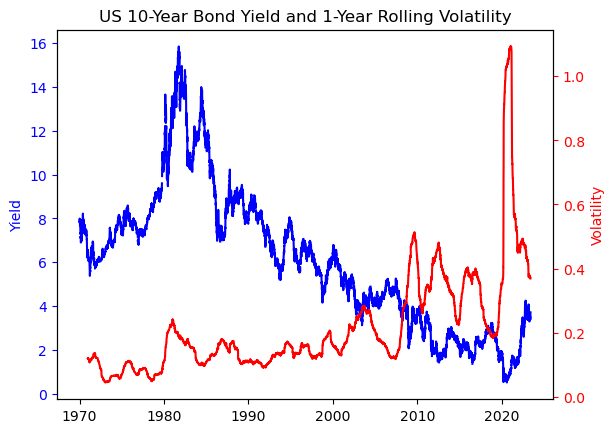

In [ ]:
# Convert yield data to a DataFrame
df_yield = pd.DataFrame({'Yield': yield_data})

# Calculate daily returns
df_yield['Return'] = df_yield['Yield'].pct_change()

# Calculate 1-year rolling volatility
df_yield['Volatility'] = df_yield['Return'].rolling(window=252).std() * (252 ** 0.5)  # Assuming 252 trading days in a year

# Plot the yield and volatility
fig, ax1 = plt.subplots()

ax1.plot(df_yield.index, df_yield['Yield'], color='blue')
ax1.set_ylabel('Yield', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(df_yield.index, df_yield['Volatility'], color='red')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params('y', colors='red')

plt.title('US 10-Year Bond Yield and 1-Year Rolling Volatility')
plt.show()

In [ ]:
# Save the data to a CSV file
df_yield.to_csv('yield_volatility_data.csv')


In [ ]:
df_yield

,Yield,Return,Volatility
1970-01-01,NaN,NaN,NaN
1970-01-02,7.86,NaN,NaN
1970-01-05,7.88,0.002545,NaN
1970-01-06,7.96,0.010152,NaN
1970-01-07,7.99,0.003769,NaN
...,...,...,...
2023-05-16,3.54,0.011429,0.371628
2023-05-17,3.57,0.008475,0.371696
2023-05-18,3.65,0.022409,0.370256
2023-05-19,3.70,0.013699,0.369216
